In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from src.io_data_model import (
    load_and_dateindex_data,
)

from src.transformation import (
    clean_production_data,
)

c:\Users\mario\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [4]:
from soya_production_parms import config

CROP = config["CROP"]
DATA_FILE = config["DATA_FILE"]
DATA_FILE_PATH = config["DATA_FILE_PATH"]
MODEL_FILE = config["MODEL_FILE"]
MODEL_PATH = config["MODEL_PATH"]
TARGET_VARIABLE = config["TARGET_VARIABLE"]
YEAR = config["YEAR"]

In [6]:
indexed_df = load_and_dateindex_data(DATA_FILE_PATH, DATA_FILE)
cleaned_df = clean_production_data(indexed_df, TARGET_VARIABLE, CROP, YEAR)
cleaned_df.tail(9)

,Province,Production (Tonnes)
Date,,
2024-01-01,Northern Cape,4000
2024-01-01,Western Cape,0
2024-01-01,North West,178000
2024-01-01,Gauteng,84000
2024-01-01,Limpopo,71000
2024-01-01,Mpumalanga,624000
2024-01-01,Kwazulu-Natal,171000
2024-01-01,Eastern Cape,14000
2024-01-01,Free State,681000


In [7]:
# Get summary statistics
cleaned_df.describe().map(lambda x: f"{x:,.0f}")

,Production (Tonnes)
count,306
mean,"75,121"
std,"161,561"
min,0
25%,"1,000"
50%,"14,000"
75%,"66,000"
max,"1,327,000"


<Axes: xlabel='Date', ylabel='Production (Tonnes)'>

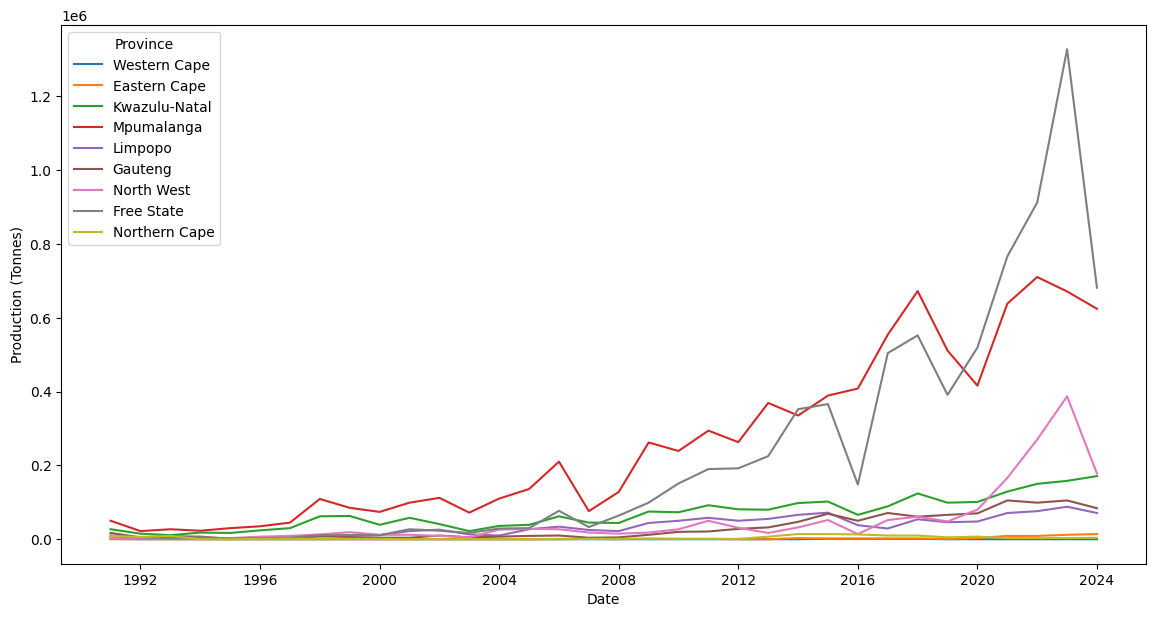

In [8]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=cleaned_df, x=cleaned_df.index, y=TARGET_VARIABLE, hue="Province")

In [9]:
# Calculate the total production for each date
total_production = cleaned_df.groupby(cleaned_df.index)[
    "Production (Tonnes)"
].transform("sum")

# Calculate the percentage split by Province for each date
cleaned_df["Percentage Split"] = (
    cleaned_df["Production (Tonnes)"] / total_production
) * 100

# Format the 'Percentage Split' column to 2 decimal places
cleaned_df["Percentage Split"] = cleaned_df["Percentage Split"].round(2)

# Calculate the 2-year, 3-year, and 5-year rolling sums
cleaned_df["2-Year Total"] = cleaned_df.groupby("Province")[
    "Production (Tonnes)"
].transform(lambda x: x.rolling(window=2, min_periods=1).sum())
cleaned_df["3-Year Total"] = cleaned_df.groupby("Province")[
    "Production (Tonnes)"
].transform(lambda x: x.rolling(window=3, min_periods=1).sum())
cleaned_df["5-Year Total"] = cleaned_df.groupby("Province")[
    "Production (Tonnes)"
].transform(lambda x: x.rolling(window=5, min_periods=1).sum())

# Calculate the percentage splits for the 2-year, 3-year, and 5-year totals
cleaned_df["2-Year Percentage Split"] = (
    cleaned_df["2-Year Total"]
    / cleaned_df.groupby(cleaned_df.index)["2-Year Total"].transform("sum")
) * 100
cleaned_df["3-Year Percentage Split"] = (
    cleaned_df["3-Year Total"]
    / cleaned_df.groupby(cleaned_df.index)["3-Year Total"].transform("sum")
) * 100
cleaned_df["5-Year Percentage Split"] = (
    cleaned_df["5-Year Total"]
    / cleaned_df.groupby(cleaned_df.index)["5-Year Total"].transform("sum")
) * 100

# Format the new percentage split columns to 2 decimal places
cleaned_df["2-Year Percentage Split"] = cleaned_df["2-Year Percentage Split"].round(2)
cleaned_df["3-Year Percentage Split"] = cleaned_df["3-Year Percentage Split"].round(2)
cleaned_df["5-Year Percentage Split"] = cleaned_df["5-Year Percentage Split"].round(2)

# Display the dataframe with the new columns
cleaned_df[cleaned_df["Province"] == "Free State"].tail()

,Province,Production (Tonnes),Percentage Split,2-Year Total,3-Year Total,5-Year Total,2-Year Percentage Split,3-Year Percentage Split,5-Year Percentage Split
Date,,,,,,,,,
2020-01-01,Free State,519000,41.72,910000.0,1462000.0,2114000.0,37.74,37.03,35.23
2021-01-01,Free State,766000,40.59,1285000.0,1676000.0,2732000.0,41.04,38.99,38.23
2022-01-01,Free State,912000,40.92,1678000.0,2197000.0,3140000.0,40.77,40.99,38.94
2023-01-01,Free State,1327000,48.24,2239000.0,3005000.0,3915000.0,44.96,43.76,42.20
2024-01-01,Free State,681000,37.27,2008000.0,2920000.0,4205000.0,43.86,42.90,42.31


<Figure size 1400x700 with 0 Axes>

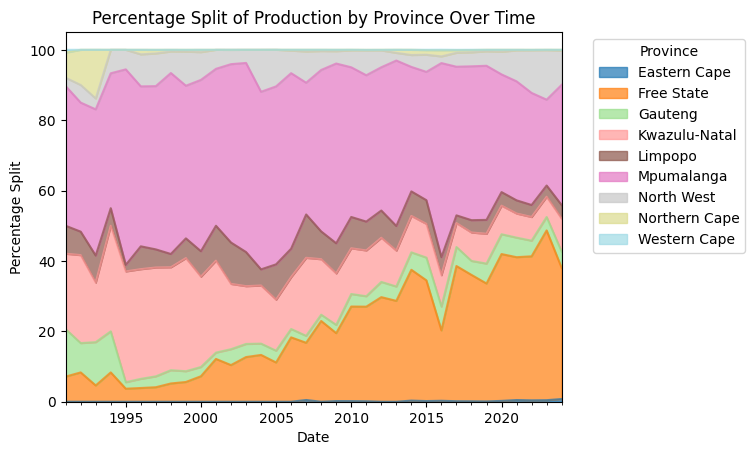

In [10]:
plt.figure(figsize=(14, 7))
# Pivot the dataframe to have provinces as columns and dates as index
pivot_df = cleaned_df.pivot_table(
    index=cleaned_df.index, columns="Province", values="Percentage Split"
)

# Plot the stacked area chart
pivot_df.plot(kind="area", stacked=True, cmap="tab20", alpha=0.7)
plt.title("Percentage Split of Production by Province Over Time")
plt.xlabel("Date")
plt.ylabel("Percentage Split")
plt.legend(title="Province", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

<Figure size 1400x700 with 0 Axes>

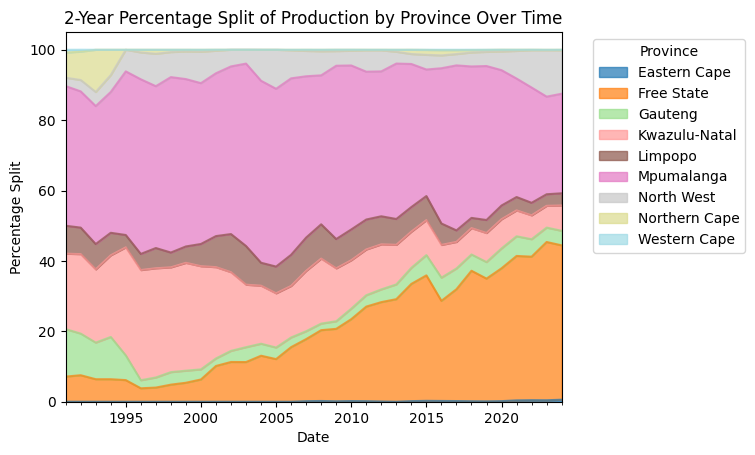

In [11]:
plt.figure(figsize=(14, 7))
# Pivot the dataframe to have provinces as columns and dates as index
pivot_df = cleaned_df.pivot_table(
    index=cleaned_df.index, columns="Province", values="2-Year Percentage Split"
)

# Plot the stacked area chart
pivot_df.plot(kind="area", stacked=True, cmap="tab20", alpha=0.7)
plt.title("2-Year Percentage Split of Production by Province Over Time")
plt.xlabel("Date")
plt.ylabel("Percentage Split")
plt.legend(title="Province", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

<Figure size 1400x700 with 0 Axes>

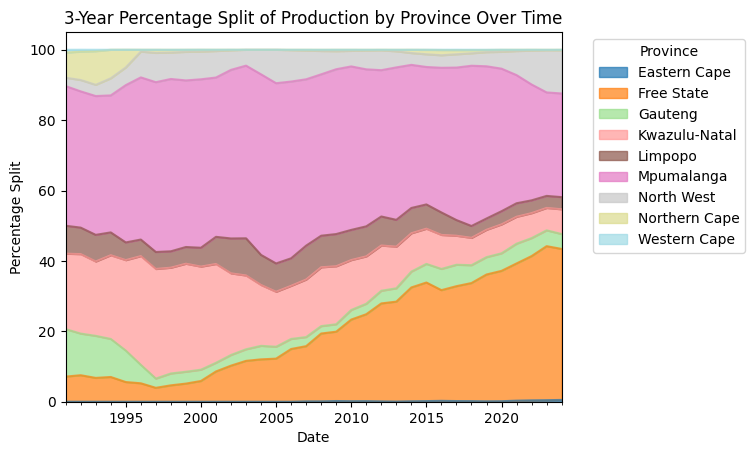

In [12]:
plt.figure(figsize=(14, 7))
# Pivot the dataframe to have provinces as columns and dates as index
pivot_df = cleaned_df.pivot_table(
    index=cleaned_df.index, columns="Province", values="3-Year Percentage Split"
)

# Plot the stacked area chart
pivot_df.plot(kind="area", stacked=True, cmap="tab20", alpha=0.7)
plt.title("3-Year Percentage Split of Production by Province Over Time")
plt.xlabel("Date")
plt.ylabel("Percentage Split")
plt.legend(title="Province", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

<Figure size 1400x700 with 0 Axes>

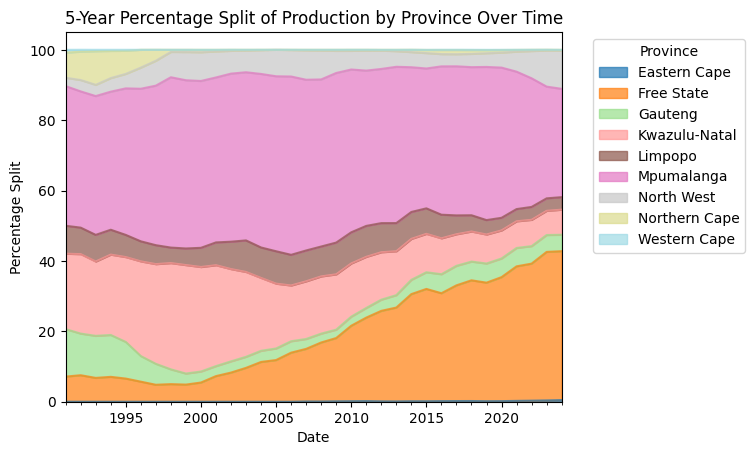

In [13]:
plt.figure(figsize=(14, 7))
# Pivot the dataframe to have provinces as columns and dates as index
pivot_df = cleaned_df.pivot_table(
    index=cleaned_df.index, columns="Province", values="5-Year Percentage Split"
)

# Plot the stacked area chart
pivot_df.plot(kind="area", stacked=True, cmap="tab20", alpha=0.7)
plt.title("5-Year Percentage Split of Production by Province Over Time")
plt.xlabel("Date")
plt.ylabel("Percentage Split")
plt.legend(title="Province", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

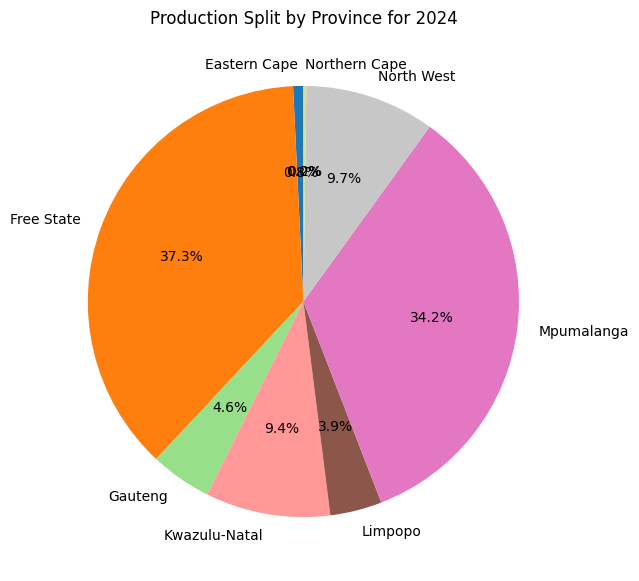

In [14]:
# Filter the latest year's data
latest_year_data = cleaned_df.loc[cleaned_df.index.year == cleaned_df.index.max().year]

# Group by province and sum the production
latest_year_production = latest_year_data.groupby("Province")[
    "Production (Tonnes)"
].sum()

# Plot the pie chart
plt.figure(figsize=(10, 7))
latest_year_production.plot.pie(
    autopct="%1.1f%%", startangle=90, cmap="tab20", legend=False
)
plt.title(f"Production Split by Province for {cleaned_df.index.max().year}")
plt.ylabel("")  # Hide the y-label
plt.show()

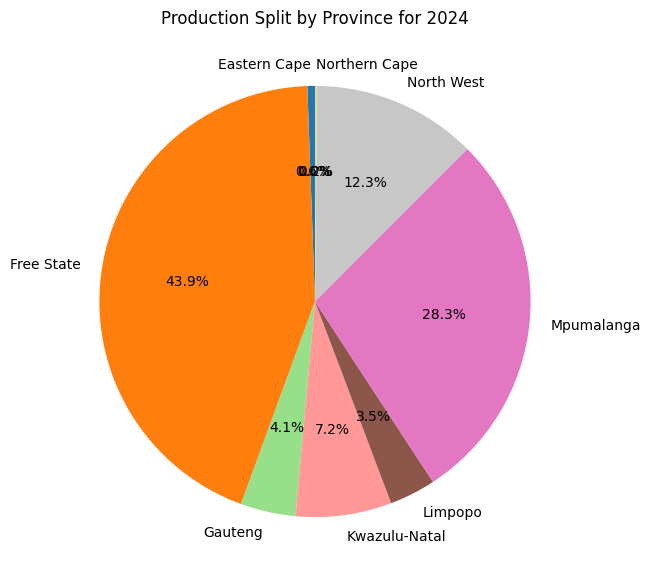

In [15]:
# Filter the latest year's data
latest_year_data = cleaned_df.loc[cleaned_df.index.year == cleaned_df.index.max().year]

# Group by province and sum the production
latest_year_production = latest_year_data.groupby("Province")["2-Year Total"].sum()

# Plot the pie chart
plt.figure(figsize=(10, 7))
latest_year_production.plot.pie(
    autopct="%1.1f%%", startangle=90, cmap="tab20", legend=False
)
plt.title(f"Production Split by Province for {cleaned_df.index.max().year}")
plt.ylabel("")  # Hide the y-label
plt.show()

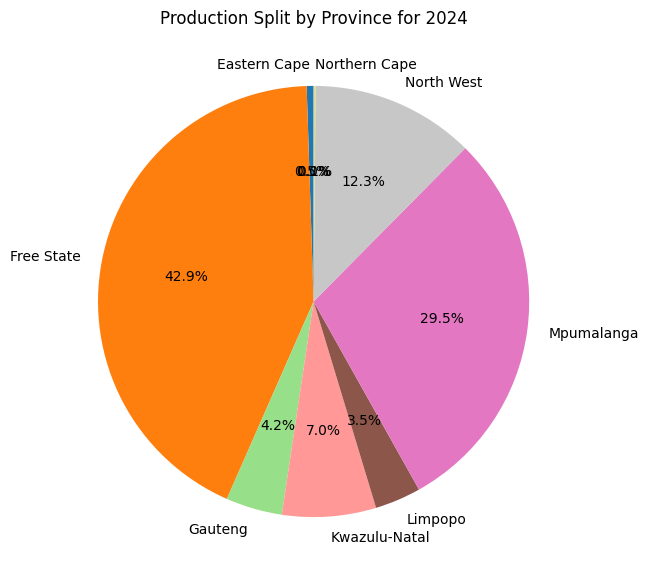

In [16]:
# Filter the latest year's data
latest_year_data = cleaned_df.loc[cleaned_df.index.year == cleaned_df.index.max().year]

# Group by province and sum the production
latest_year_production = latest_year_data.groupby("Province")["3-Year Total"].sum()

# Plot the pie chart
plt.figure(figsize=(10, 7))
latest_year_production.plot.pie(
    autopct="%1.1f%%", startangle=90, cmap="tab20", legend=False
)
plt.title(f"Production Split by Province for {cleaned_df.index.max().year}")
plt.ylabel("")  # Hide the y-label
plt.show()

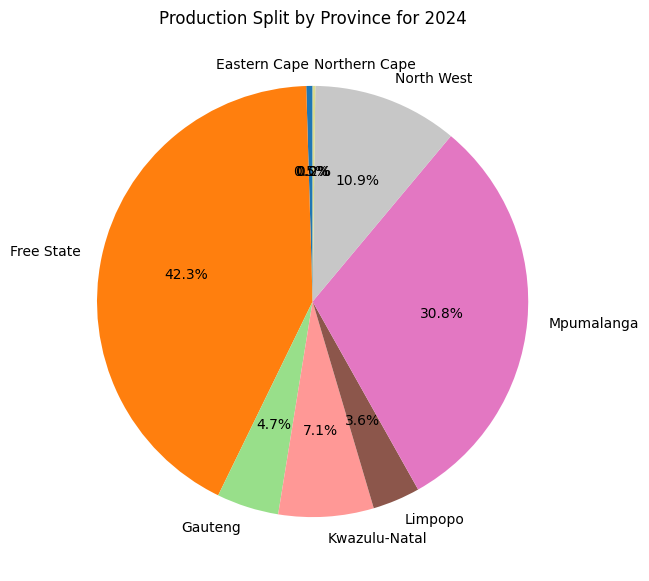

In [17]:
# Filter the latest year's data
latest_year_data = cleaned_df.loc[cleaned_df.index.year == cleaned_df.index.max().year]

# Group by province and sum the production
latest_year_production = latest_year_data.groupby("Province")["5-Year Total"].sum()

# Plot the pie chart
plt.figure(figsize=(10, 7))
latest_year_production.plot.pie(
    autopct="%1.1f%%", startangle=90, cmap="tab20", legend=False
)
plt.title(f"Production Split by Province for {cleaned_df.index.max().year}")
plt.ylabel("")  # Hide the y-label
plt.show()

In [23]:
chosen_splits_df = cleaned_df[cleaned_df.index.year == YEAR][
    ["Province", "2-Year Percentage Split"]
]
chosen_splits_df.rename(
    columns={"2-Year Percentage Split": "Percentage Split"}, inplace=True
)
chosen_splits_df

,Province,Percentage Split
Date,,
2024-01-01,Northern Cape,0.15
2024-01-01,Western Cape,0.00
2024-01-01,North West,12.34
2024-01-01,Gauteng,4.13
2024-01-01,Limpopo,3.47
2024-01-01,Mpumalanga,28.29
2024-01-01,Kwazulu-Natal,7.19
2024-01-01,Eastern Cape,0.57
2024-01-01,Free State,43.86


In [25]:
os.chdir(MODEL_PATH)
chosen_splits_df.to_excel(f"{MODEL_FILE}.xlsx")